In [7]:
import numpy as np
import random
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator


Load Dataset

In [8]:
x_train = np.loadtxt('input.csv', delimiter=',')
y_train = np.loadtxt('labels.csv', delimiter=',')

x_test = np.loadtxt('input_test.csv', delimiter=',')
y_test = np.loadtxt('labels_test.csv', delimiter=',')


Reshaped Images

In [9]:
x_train=x_train.reshape(len(x_train),100,100,3)
y_train=y_train.reshape(len(y_train),1)

x_test=x_test.reshape(len(x_test),100,100,3)
y_test=y_test.reshape(len(y_test),1)

x_train=x_train/255.0
x_test=x_test/255.0

In [10]:
print("Shape of x_train:",x_train.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of x_test:",x_test.shape)
print("Shape of y_test:",x_test.shape)

Shape of x_train: (2000, 100, 100, 3)
Shape of y_train: (2000, 1)
Shape of x_test: (400, 100, 100, 3)
Shape of y_test: (400, 100, 100, 3)


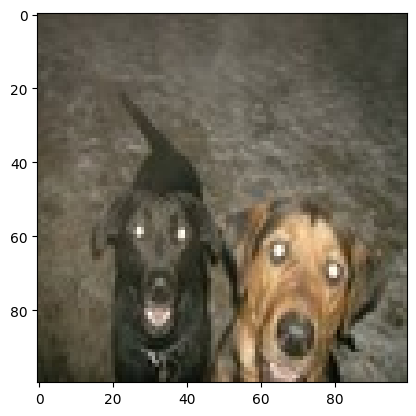

In [11]:
idx = random.randint(0,len(x_train)-1)
plt.imshow(x_train[idx,:])
plt.show()

In [1]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
])

NameError: name 'Sequential' is not defined

In [13]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
model.fit(x_train,y_train,epochs=5,batch_size=64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.5065 - loss: 0.7565
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.5945 - loss: 0.6811
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.6425 - loss: 0.6404
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.6960 - loss: 0.5850
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.7335 - loss: 0.5277


In [16]:
model.evaluate(x_test,y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6525 - loss: 0.6279


[0.627894937992096, 0.6524999737739563]

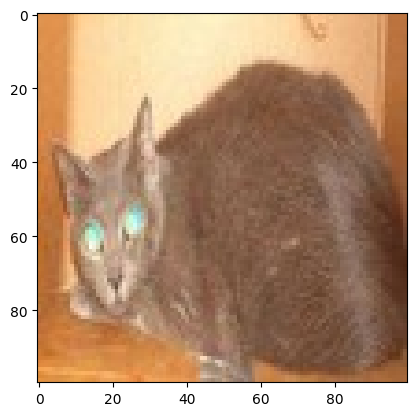

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Our model says is is a: cat


In [18]:
idx2=random.randint(0,len(y_test))
plt.imshow(x_test[idx2,:])
plt.show()

y_pred=model.predict(x_test[idx2,:].reshape(1,100,100,3))
y_pred=y_pred>0.5

if(y_pred==0):
    pred="dog"
else:
    pred="cat"

print("Our model says is is a:", pred)